### Problem 2 : Data Engineering Challenge

##### Description: 
You are provided with a zip file named data.zip, which contains a folder named BBC_articles. Inside this folder are text files named as "articleID_category", where "articleID" corresponds to the unique identifier of the article and "category" denotes the category of the article. Your task is to structure the data by creating a CSV file with appropriate columns. Then, you need to write code to read the CSV data, tokenize the text, and prepare the dataset to have numerical features using vectorization. Goal is to clean and prepare the dataset so that in can be trained using NLP-classification techniques.

#### Task1 (Data Structuring):

- Unzip the data.zip file to access the BBC_articles folder.
- Inside the BBC_articles folder, each text file is named as "articleID_category", where "articleID" is a unique identifier and "category" is the category of the article.
- Create a CSV file named bbc_articles.csv with the following columns:
    - article_id: Unique identifier for each article.
    - text: Text content of the article.
    - category: Category of the article.

#### Task 2 (Data Preprocessing for Model Training):

- Read the bbc_articles.csv file into a DataFrame using Python.
- Tokenize the text data using a suitable tokenizer (e.g., NLTK, SpaCy)(Even better if you perform custom tokenization.)
- Perform any necessary preprocessing steps such as lowercasing, removing stopwords, punctuation, etc.
- Make a new csv file with numerical features and given labels.
- Note: Features are typically derived through text vectorization techniques such as:
    - Bag-of-Words (BoW): Each feature represents the count or frequency of each word in the document.
    - TF-IDF (Term Frequency-Inverse Document Frequency): Each feature represents the TF-IDF score of each word in the document.
    - Word Embeddings: Each feature represents the vector representation of each word in the document (e.g., Word2Vec, GloVe).
- You are free to choose how you vectorize to get the feature

#### Submission Requirements:

- Submit the structured CSV file bbc_articles.csv.
- Submit final datset as a CSV file containing numerical features.
> (name it as vectorized_dataset.csv).

- Provide the Python code used to preprocess the data and vectorize ot for the text classification.
- Include a brief report or documentation summarizing the preprocessing steps, and what methods you adopted for featurization.
- Additional Notes:
    - Ensure that your code is well-commented and follows best practices for readability and maintainability.
    - Provide any necessary instructions or requirements for running your code, such as package dependencies or environment setup.

# IMPORT

In [1]:
import os, csv, json
import pandas as pd
import numpy as np
from tqdm import tqdm

# USEFUL FUNCTIONS

In [2]:
def loadJSON(filepathh):
    _dataa = {} 
    if os.path.exists(filepathh):
        with open(filepathh, "r", encoding="utf-8") as _f:
            _dataa = json.load(_f)
    else:
        print(f"{filepathh} does not exists...\n") 
    return _dataa 

def loadTXT(filepathh):
    _dataa = ""
    if os.path.exists(filepathh):
        with open(filepathh, "r", encoding="utf-8") as _f:
            _dataa = _f.read()
    else:
        print(f"{filepathh} does not exists...\n") 
    return _dataa 

def loadFILE(filepathh = ""):
    if os.path.exists(filepathh):
        if filepathh.endswith(".txt"):
            return loadTXT(filepathh)
        elif filepathh.endswith(".json"):
            return loadJSON(filepathh)
        else:
            print("\n- Invalid File format 😐 !!!\n")
            return None
    else:
        print(f"{filepathh} does not exists...\n") 

def fileExists(file_path):
    _choice = 1
    if os.path.exists(file_path):
        print(f"File with filename - '{os.path.basename(file_path)}' exists !!!")
        _choice = 0
        _choice_str = input("Overwrite it ? (1/0)").strip()
        if _choice_str in "10" and len(_choice_str) == 1:
            _choice = int(_choice_str)
    return _choice

# TASK 1 

### HELPER FUNCTIONS

In [3]:
def convert_dict_to_csv(my_ds = {}, csv_file_path = "./bbc_articles.csv", verbose = False):
    """
    FOR CONVERTING THE DATA STRUCTURE WE CREATED TO CSV STRUCTURE
    """
    if fileExists(csv_file_path):
        req_fieldnames = ['article_id', 'text', 'category']
        
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
            if verbose:
                print(f"CSV file with filename - '{os.path.basename(csv_file_path)}' created.")
                # _count = 0
                # _max_count = len(my_ds)

            writer = csv.DictWriter(csvfile, fieldnames=req_fieldnames)
            
            writer.writeheader()
            
            for _ , values in tqdm(my_ds.items()):
                _article_id, _category, _text = values
                writer.writerow({'article_id': _article_id, 'text': _text, 'category': _category})
                # if verbose:
                #     print(f"{_count}/{_max_count} written ...", end="\r")
            
        if verbose:
            print(f"CSV file with filename - '{os.path.basename(csv_file_path)}' written.")
            print("\n")
        return 1 # OUTPUT FOR SUCCESS
    
    if verbose:
        print(f"CSV file with filename - '{os.path.basename(csv_file_path)}' was not written.")
    
    return 0 # OUTPUT FOR FAILURE


In [4]:
# DATA PATH
BBC_data_folder = "../selection-problems/data/data/BBC_articles/"

In [5]:
# LISTING FILES TO PROCESS
id_category_files_list = [i for i in os.listdir(BBC_data_folder) if i.endswith('.txt')]
len(id_category_files_list), id_category_files_list[:5]

(1490,
 ['1003_entertainment.txt',
  '1004_tech.txt',
  '1005_entertainment.txt',
  '1007_business.txt',
  '1008_politics.txt'])

In [6]:
# MAKING DATA STRUCTURE
#     {
#         filename1_id_category.txt : [article_id, categoty, text],
#         filename2_id_category.txt : [article_id, categoty, text],
#         .
#         .
#         .
#     }

data_struc_dict = {_ : _[:-4].split('_') for _ in id_category_files_list} 
list(data_struc_dict.items())[:5]

[data_struc_dict[_id_category_file].append(loadFILE(BBC_data_folder+_id_category_file)) for _id_category_file in tqdm(id_category_files_list, desc="id_category_files")]
len(data_struc_dict.items()), list(data_struc_dict.items())[:5]


id_category_files:   0%|          | 0/1490 [00:00<?, ?it/s]

id_category_files: 100%|██████████| 1490/1490 [00:00<00:00, 2227.43it/s]


(1490,
 [('1003_entertainment.txt',
   ['1003',
    'entertainment',
    'jamelia s return to the top r&b star jamelia had three brit nominations to go with her triple triumph at last year s mobo awards.  the birmingham-born singer  full name jamelia davis  was signed to a record label at the age of 15 and released her first single so high at 18. she released four number ones from her 2000 album drama  including the top five hit money featuring the vocals of reggae artist beenie man. she racked up five mobo nominations in 2000  winning one for best video. but in the same year she also fell pregnant and decided to take a break from music to bring up her daughter teja  who was born in march 2001. while she originally planned to get back to work pretty swiftly after giving birth it was actually two years before she released another single. during her absence r&b music exploded and a whole host of female artists were on the scene  meaning jamelia had to once again prove herself. her comeba

In [63]:
# PATH OF CSV FILE TO MAKE
csv_file_to_make_path = "./bbc_articles.csv"


In [8]:
# CALLING FUNCTION TO CONVERT OUR DATA STRUCTURE TO CSV FILE
convert_dict_to_csv(data_struc_dict, 
                    csv_file_to_make_path, 
                    verbose=1)

File with filename - 'bbc_articles.csv' exists !!!


CSV file with filename - 'bbc_articles.csv' was not written.


0

# TASK 2

In [4]:
import torch
# import torch.nn as nn
# import transformers
from transformers import AutoModel, AutoTokenizer
# from transformers import BertTokenizer, BertModel, BertTokenizerFast

from langchain.text_splitter import RecursiveCharacterTextSplitter

### HELPER FUNCTIONS

In [5]:
def process_categories(df_obj):
    """
    DOING ONE-HOT ENCODING AND RETURNING THE ENCODING 
    """
    unique_categories = sorted(df_obj['category'].unique())
    category_label_map = {category: i for i, category in enumerate(unique_categories)}    
    df_obj['category_label'] = df_obj['category'].map(category_label_map)

    # df.drop(columns=['category'], inplace=True) # WE CAN DROP THE COLUMN IF WE WANT
    
    return df_obj, category_label_map

def model_embedding(sentence, model, tokenizer, max_tokens, device, output_numpy=True ):
    # TOKENIZATION STEP
    tokenized = tokenizer(sentence, 
                          max_length=max_tokens, # CHANGE THIS DEPENDING ON THE MODEL YOU USE
                          truncation=True, 
                          padding = True,
                          return_tensors='pt').to(device) # GPU IF AVAILABLE

    with torch.no_grad():
        output = model(**tokenized, 
                       output_hidden_states=True)
        
   # COMBINE FINAL HIDDEN STATES ACROSS ALL LAYERS
    hidden_states = torch.cat(output[2])

    # CALCULATE AVERAGE EMBEDDING
    embedding = torch.mean(hidden_states[-1:,:,:].squeeze(), dim=0)

    # CONVERT TO NUMPY ARRAY IF NEEDED (DEFAULT)
    if output_numpy:
        embedding = embedding.cpu().numpy()
    
    return embedding

def save_data_to_csv(df_obj, csv_file_path = "./vectorized_dataset.csv", verbose = False):
    if fileExists(csv_file_path):
        df_obj.to_csv(csv_file_path, index=False)
        if verbose:
            print(f"CSV file with filename - '{os.path.basename(csv_file_path)}' written.")
            print("\n")
        return 1
    if verbose:
        print(f"CSV file with filename - '{os.path.basename(csv_file_path)}' was not written.")
    
    return 0

# Function to split text into chunks
def split_text(text, chunk_size = 500, chunk_overlap = 50):
    splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, 
                                              chunk_overlap=chunk_overlap)
    chunks = splitter.split_text(text)
    chunk_list = [{'chunk_no': i, 'chunk': chunk} for i, chunk in enumerate(chunks)]
    return chunk_list
    # return chunks


### DATA PREPROCESSING

In [29]:
# DATA PATH 
bbc_csv_path = "./bbc_articles.csv"

In [30]:
# READING AND PUTTING THE CSV DATA IN df
df = pd.read_csv(bbc_csv_path)
df.head()

,article_id,text,category
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment
1,1004,microsoft releases bumper patches microsoft ha...,tech
2,1005,critics back aviator for oscars martin scorses...,entertainment
3,1007,winemaker rejects foster s offer australian wi...,business
4,1008,child access law shake-up planned parents who ...,politics


One-hot encoding

In [31]:
# PROCESSING THE category AND MAKING IT NUMERIC TYPE
df, label_mapp = process_categories(df) 
df.head()

,article_id,text,category,category_label
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1
1,1004,microsoft releases bumper patches microsoft ha...,tech,4
2,1005,critics back aviator for oscars martin scorses...,entertainment,1
3,1007,winemaker rejects foster s offer australian wi...,business,0
4,1008,child access law shake-up planned parents who ...,politics,2


In [32]:
# THE DIFFERENT CATEGORIES AND ASSIGNED LABELS
label_mapp

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [33]:
# VIEWING THE DISTRIBUTION OF CATEGORIES
df['category_label'].value_counts(normalize=True)*100

category_label
3    23.221477
0    22.550336
2    18.389262
1    18.322148
4    17.516779
Name: proportion, dtype: float64

#### PREPAIRING LLM

CHOOSE YOUR MODEL

In [34]:
# I AM USING BERT MODEL
# model_name = 'google-bert/bert-base-uncased'
model_name = 'google-bert/bert-large-uncased'  # <--- LARGER MODEL
short_model_name = "BERT"

max_accept = 512 # TOKENS; NEWER LARGER MODELS HAVE LONGER CONTEXT WINDOWS

In [12]:
# CHECK AND ASSIGN GPU AS DEVICE FOR LOADING AND PROCESSING
device = torch.device(f"cuda:{0}" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

LOAD THE MODEL

In [35]:
# LOAD PRE-TRAINED TOKENIZER AND MODEL
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

CHECKING IF TEXT LENGTH IS LONGER THAN CONTEXT WINDOW OF THE MODEL

In [36]:
def no_tokens(text):
    num_tokens = 0
    word_len = 0
    ratioo = 1.0
    with torch.no_grad():
        # tokenize whole text
        word_len = len(text.strip().split())
        inputs = tokenizer([text], return_tensors="pt")
        num_tokens = len(inputs["input_ids"][0])
        ratioo = word_len/num_tokens
        print(f"-- Words = {word_len}, tokens = {num_tokens}, ratio = {ratioo}")
    return (word_len, num_tokens, ratioo)

print(f"Max acceptable token limit : {max_accept}")
num_tokenss = df['text'].apply(no_tokens)


Token indices sequence length is longer than the specified maximum sequence length for this model (1283 > 512). Running this sequence through the model will result in indexing errors


Max acceptable token limit : 512
-- Words = 402, tokens = 457, ratio = 0.8796498905908097
-- Words = 280, tokens = 320, ratio = 0.875
-- Words = 1024, tokens = 1283, ratio = 0.7981293842556508
-- Words = 302, tokens = 401, ratio = 0.7531172069825436
-- Words = 583, tokens = 642, ratio = 0.9080996884735203
-- Words = 403, tokens = 451, ratio = 0.893569844789357
-- Words = 367, tokens = 431, ratio = 0.851508120649652
-- Words = 888, tokens = 988, ratio = 0.8987854251012146
-- Words = 463, tokens = 523, ratio = 0.8852772466539197
-- Words = 151, tokens = 183, ratio = 0.825136612021858
-- Words = 184, tokens = 218, ratio = 0.8440366972477065
-- Words = 198, tokens = 231, ratio = 0.8571428571428571
-- Words = 407, tokens = 483, ratio = 0.8426501035196687
-- Words = 734, tokens = 815, ratio = 0.9006134969325154
-- Words = 218, tokens = 373, ratio = 0.5844504021447721
-- Words = 749, tokens = 830, ratio = 0.9024096385542169
-- Words = 855, tokens = 1220, ratio = 0.7008196721311475
-- Words = 

In [37]:
print("Max number of word count :",max(num_tokenss))
print("Max 5 number of word counts :", sorted(num_tokenss, reverse=1)[:5])
print("Average token length :", round(np.mean([i[1] for i in num_tokenss]), 2))
print("Max token length :", np.max([i[1] for i in num_tokenss]))

Max number of word count : (3345, 3699, 0.9042984590429846)
Max 5 number of word counts : [(3345, 3699, 0.9042984590429846), (2448, 2896, 0.8453038674033149), (2427, 2944, 0.8243885869565217), (1671, 1960, 0.8525510204081632), (1549, 1873, 0.8270154831820609)]
Average token length : 448.48
Max token length : 3699


----

----

VISUALIZING THE DISTRIBUTIN

In [38]:
import matplotlib.pyplot as plt

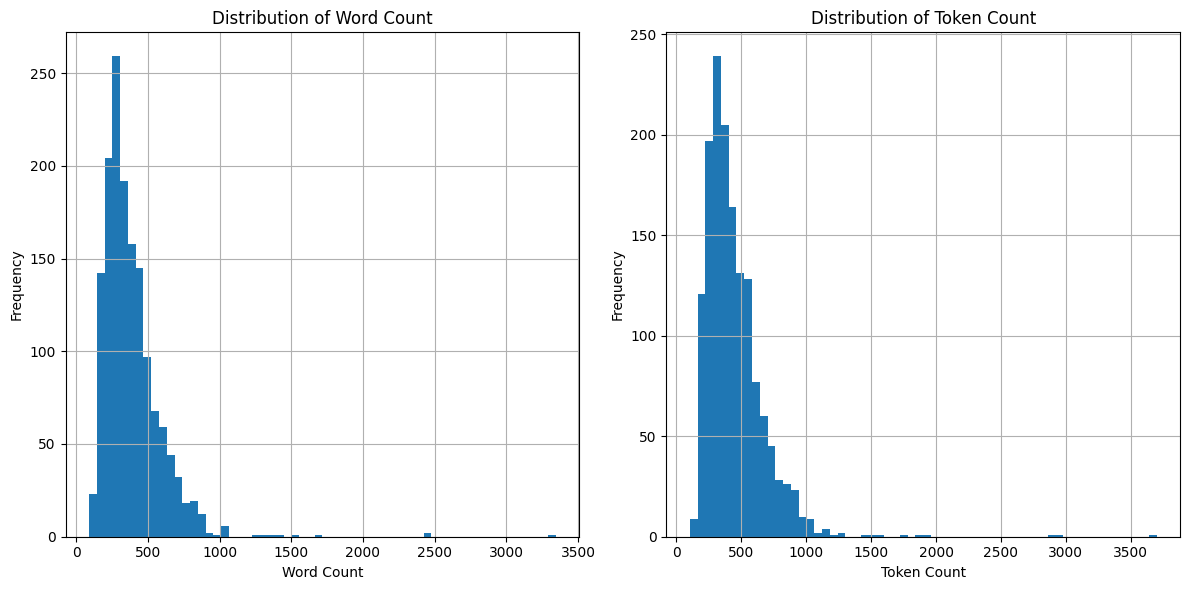

In [39]:
# Extract word_count and token_count from the data
dataa = []
dataa[:] = num_tokenss[:] # COPYING

word_counts = [item[0] for item in dataa]
token_counts = [item[1] for item in dataa]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

bin_count = 60

# Plot distribution of word_count
axs[0].hist(word_counts, bins=bin_count)
axs[0].set_title('Distribution of Word Count')
axs[0].set_xlabel('Word Count')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot distribution of token_count
axs[1].hist(token_counts, bins=bin_count)
axs[1].set_title('Distribution of Token Count')
axs[1].set_xlabel('Token Count')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

----

----

In [40]:
# CHOOSE YOUR DESIRED CHUNK SIZE AND OVERLAP SIZE
chunk_size = 1800
chunk_overlap = 200


In [41]:
# Apply the function to each row in the dataframe
df['chunks'] = df['text'].apply(split_text, args=(chunk_size, chunk_overlap))

# Explode the 'chunks' column to separate rows
df = df.explode('chunks')

df.head()


,article_id,text,category,category_label,chunks
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1,"{'chunk_no': 0, 'chunk': 'jamelia s return to ..."
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1,"{'chunk_no': 1, 'chunk': 'publicity but it was..."
1,1004,microsoft releases bumper patches microsoft ha...,tech,4,"{'chunk_no': 0, 'chunk': 'microsoft releases b..."
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,"{'chunk_no': 0, 'chunk': 'critics back aviator..."
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,"{'chunk_no': 1, 'chunk': 'i could have sworn s..."


In [42]:
df[['text','chunks']].head(10)

,text,chunks
0,jamelia s return to the top r&b star jamelia h...,"{'chunk_no': 0, 'chunk': 'jamelia s return to ..."
0,jamelia s return to the top r&b star jamelia h...,"{'chunk_no': 1, 'chunk': 'publicity but it was..."
1,microsoft releases bumper patches microsoft ha...,"{'chunk_no': 0, 'chunk': 'microsoft releases b..."
2,critics back aviator for oscars martin scorses...,"{'chunk_no': 0, 'chunk': 'critics back aviator..."
2,critics back aviator for oscars martin scorses...,"{'chunk_no': 1, 'chunk': 'i could have sworn s..."
2,critics back aviator for oscars martin scorses...,"{'chunk_no': 2, 'chunk': 'to flip by one vote ..."
2,critics back aviator for oscars martin scorses...,"{'chunk_no': 3, 'chunk': '- hilary swank. - t..."
3,winemaker rejects foster s offer australian wi...,"{'chunk_no': 0, 'chunk': 'winemaker rejects fo..."
3,winemaker rejects foster s offer australian wi...,"{'chunk_no': 1, 'chunk': 'oatley family which..."
4,child access law shake-up planned parents who ...,"{'chunk_no': 0, 'chunk': 'child access law sha..."


In [43]:
# Extract 'chunk_no' and 'chunk' values into separate columns
df['chunk_no'] = df['chunks'].apply(lambda x: x['chunk_no'])
df['chunk'] = df['chunks'].apply(lambda x: x['chunk'])

# Drop the 'chunks' column
df = df.drop(columns=['chunks'])

df.head(10)

,article_id,text,category,category_label,chunk_no,chunk
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1,0,jamelia s return to the top r&b star jamelia h...
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1,1,publicity but it was also greeted favourably b...
1,1004,microsoft releases bumper patches microsoft ha...,tech,4,0,microsoft releases bumper patches microsoft ha...
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,0,critics back aviator for oscars martin scorses...
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,1,i could have sworn scorsese would get it just ...
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,2,to flip by one vote and go the other way he ...
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,3,- hilary swank. - tim dams screen internatio...
3,1007,winemaker rejects foster s offer australian wi...,business,0,0,winemaker rejects foster s offer australian wi...
3,1007,winemaker rejects foster s offer australian wi...,business,0,1,oatley family which founded the rosemount est...
4,1008,child access law shake-up planned parents who ...,politics,2,0,child access law shake-up planned parents who ...


----

----

AFTER CHUNKING...

In [44]:

def no_tokens(text):
    num_tokens = 0
    word_len = 0
    ratioo = 1.0
    with torch.no_grad():
        # tokenize whole text
        word_len = len(text.strip().split())
        inputs = tokenizer([text], return_tensors="pt")
        num_tokens = len(inputs["input_ids"][0])
        ratioo = word_len/num_tokens
        print(f"-- Words = {word_len}, tokens = {num_tokens}, ratio = {ratioo}")
    return (word_len, num_tokens, ratioo)

print(f"Max acceptable token limit : {max_accept}")
num_tokenss = df['chunk'].apply(no_tokens)


Max acceptable token limit : 512
-- Words = 325, tokens = 367, ratio = 0.885558583106267
-- Words = 109, tokens = 130, ratio = 0.8384615384615385
-- Words = 280, tokens = 320, ratio = 0.875
-- Words = 315, tokens = 359, ratio = 0.8774373259052924
-- Words = 337, tokens = 397, ratio = 0.8488664987405542
-- Words = 321, tokens = 422, ratio = 0.7606635071090048
-- Words = 165, tokens = 248, ratio = 0.6653225806451613
-- Words = 286, tokens = 372, ratio = 0.7688172043010753
-- Words = 48, tokens = 70, ratio = 0.6857142857142857
-- Words = 287, tokens = 319, ratio = 0.8996865203761756
-- Words = 302, tokens = 335, ratio = 0.9014925373134328
-- Words = 53, tokens = 59, ratio = 0.8983050847457628
-- Words = 330, tokens = 370, ratio = 0.8918918918918919
-- Words = 109, tokens = 125, ratio = 0.872
-- Words = 320, tokens = 373, ratio = 0.8579088471849866
-- Words = 83, tokens = 103, ratio = 0.8058252427184466
-- Words = 324, tokens = 356, ratio = 0.9101123595505618
-- Words = 304, tokens = 344, 

In [45]:
print("Max number of word count :",max(num_tokenss))
print("Max 5 number of word counts :", sorted(num_tokenss, reverse=1)[:5])
print("Average token length :", round(np.mean([i[1] for i in num_tokenss]), 2))
print("Max token length :", np.max([i[1] for i in num_tokenss]))

Max number of word count : (355, 391, 0.907928388746803)
Max 5 number of word counts : [(355, 391, 0.907928388746803), (351, 400, 0.8775), (351, 385, 0.9116883116883117), (350, 388, 0.9020618556701031), (349, 384, 0.9088541666666666)]
Average token length : 276.3
Max token length : 476


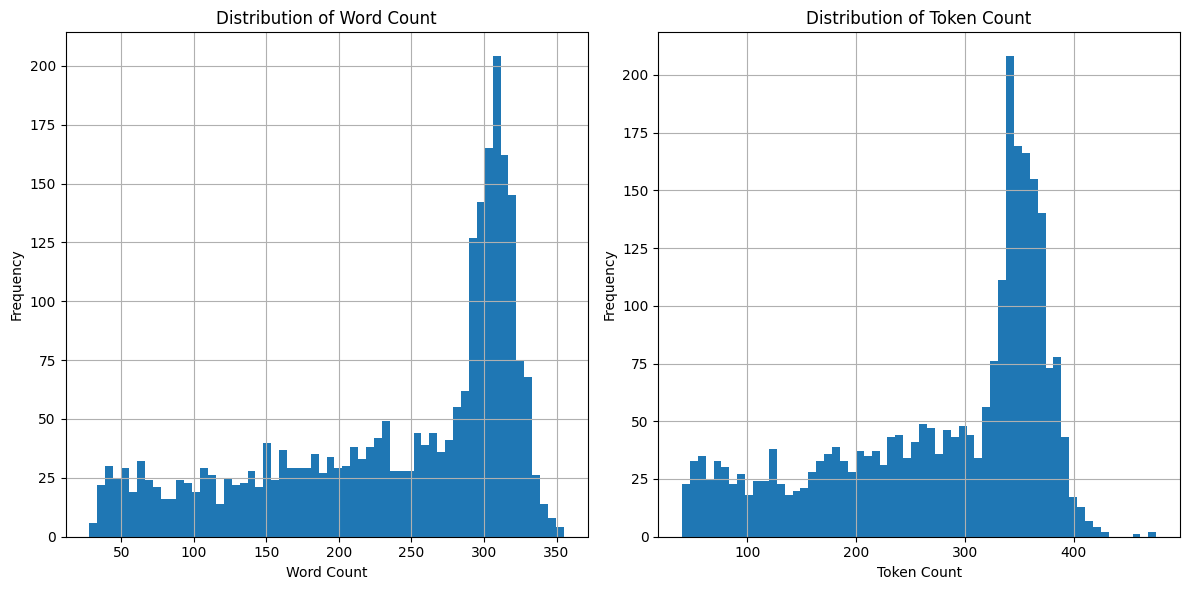

In [46]:
# Extract word_count and token_count from the data
dataa = []
dataa[:] = num_tokenss[:] # COPYING

word_counts = [item[0] for item in dataa]
token_counts = [item[1] for item in dataa]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

bin_count = 60

# Plot distribution of word_count
axs[0].hist(word_counts, bins=bin_count)
axs[0].set_title('Distribution of Word Count')
axs[0].set_xlabel('Word Count')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot distribution of token_count
axs[1].hist(token_counts, bins=bin_count)
axs[1].set_title('Distribution of Token Count')
axs[1].set_xlabel('Token Count')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

----
----

### VECTORIZE THE CHUNKS

USE THE MODEL

In [47]:
# VECTORIZE EACH SENTENCE AND SAVE IT IN THE DATAFRAME
model_args = (model, tokenizer, max_accept, device)

df[f'{short_model_name}_embeddings'] = df['chunk'].apply(model_embedding, 
                                                         args=model_args)


In [48]:
# THE FINAL df LOOKS LIKE - 
df.head()

,article_id,text,category,category_label,chunk_no,chunk,BERT_embeddings
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1,0,jamelia s return to the top r&b star jamelia h...,"[-0.4060017, -0.15693775, -0.29913557, -0.2127..."
0,1003,jamelia s return to the top r&b star jamelia h...,entertainment,1,1,publicity but it was also greeted favourably b...,"[-0.33664978, -0.12437239, -0.3683167, -0.2470..."
1,1004,microsoft releases bumper patches microsoft ha...,tech,4,0,microsoft releases bumper patches microsoft ha...,"[-0.37169287, -0.20208219, -0.18379024, -0.231..."
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,0,critics back aviator for oscars martin scorses...,"[-0.19059175, -0.18707457, -0.18061735, -0.261..."
2,1005,critics back aviator for oscars martin scorses...,entertainment,1,1,i could have sworn scorsese would get it just ...,"[-0.22067164, -0.24549592, -0.21733634, -0.329..."


##### SAVE IT TO CSV FILE

In [49]:
# vectorized_csv_filepath = "./vectorized_dataset_BERT_BASE.csv"
vectorized_csv_filepath = "./vectorized_dataset.csv"


In [50]:
# SAVE IT TO CSV FILE
save_data_to_csv(df, csv_file_path=vectorized_csv_filepath, verbose=1)

File with filename - 'vectorized_dataset.csv' exists !!!
CSV file with filename - 'vectorized_dataset.csv' written.




1